In [57]:
import tensorflow as tf
import numpy as np
import pandas as pd
from helpers import scaling,scaling_reverse, RSquaredSeparated
import h5py
from matplotlib import pyplot as plt
from tensorflow.keras.utils import Progbar


In [58]:
dataset = "run_5_case3b_400000.h5"
input_df = pd.read_hdf(dataset,key="input")
output_df = pd.read_hdf(dataset,key="output")


In [59]:
for i in range(115):
    print(input_df.columns[i], input_df.columns[i+115])

ARS01_DBPM_0760_X ARS01_DBPM_0760_Y
ARS01_DBPM_1080_X ARS01_DBPM_1080_Y
ARS01_DBPM_1460_X ARS01_DBPM_1460_Y
ARS01_DBPM_1900_X ARS01_DBPM_1900_Y
ARS01_DBPM_2410_X ARS01_DBPM_2410_Y
ARS01_DBPM_2910_X ARS01_DBPM_2910_Y
ARS01_DBPM_4220_X ARS01_DBPM_4220_Y
ARS01_DBPM_4720_X ARS01_DBPM_4720_Y
ARS01_DBPM_5250_X ARS01_DBPM_5250_Y
ARS01_DBPM_5880_X ARS01_DBPM_5880_Y
ARS02_DBPM_1080_X ARS02_DBPM_1080_Y
ARS02_DBPM_1460_X ARS02_DBPM_1460_Y
ARS02_DBPM_1900_X ARS02_DBPM_1900_Y
ARS02_DBPM_2410_X ARS02_DBPM_2410_Y
ARS02_DBPM_2910_X ARS02_DBPM_2910_Y
ARS02_DBPM_4220_X ARS02_DBPM_4220_Y
ARS02_DBPM_4720_X ARS02_DBPM_4720_Y
ARS02_DBPM_5250_X ARS02_DBPM_5250_Y
ARS02_DBPM_5880_X ARS02_DBPM_5880_Y
ARS03_DBPM_0810_X ARS03_DBPM_0810_Y
ARS03_DBPM_1080_X ARS03_DBPM_1080_Y
ARS03_DBPM_1460_X ARS03_DBPM_1460_Y
ARS03_DBPM_1900_X ARS03_DBPM_1900_Y
ARS03_DBPM_2410_X ARS03_DBPM_2410_Y
ARS03_DBPM_2910_X ARS03_DBPM_2910_Y
ARS03_DBPM_4220_X ARS03_DBPM_4220_Y
ARS03_DBPM_4720_X ARS03_DBPM_4720_Y
ARS03_DBPM_5250_X ARS03_DBPM

In [60]:
input_df.head()

ARS01_DBPM_0760_X  ARS01_DBPM_1080_X  ARS01_DBPM_1460_X  \
18952           0.194713           0.287891           0.188997   
19704          -0.541724          -0.442430          -0.116029   
9806            0.757254           0.773477           0.350953   
23860          -2.253851          -1.255498          -0.324520   
1421           -0.771736          -0.594089          -0.172349   

       ARS01_DBPM_1900_X  ARS01_DBPM_2410_X  ARS01_DBPM_2910_X  \
18952           0.007818           0.166966           0.136434   
19704           0.350516          -0.190472           0.138938   
9806           -0.229997          -0.019973           0.449885   
23860           0.882744          -1.406939           1.054991   
1421            0.423367          -0.371433           0.234843   

       ARS01_DBPM_4220_X  ARS01_DBPM_4720_X  ARS01_DBPM_5250_X  \
18952           0.027876           0.253173          -0.036271   
19704           0.101976          -0.161825           0.322022   
9806           -0.633792           0.829819          -0.715783   
23860          -0.979367           0.272879           0.052305   
1421           -0.035714          -0.148463           0.290627   

       ARS01_DBPM_5880_X  ...  ARS12_DBPM_1080_Y  ARS12_DBPM_1460_Y  \
18952           0.289982  ...          -0.001012          -0.023135   
19704          -0.378147  ...          -0.198095          -0.208293   
9806            0.877069  ...           0.176727           0.144943   
23860          -0.968603  ...           0.039355          -0.006822   
1421           -0.530332  ...          -0.331924          -0.443738   

       ARS12_DBPM_1900_Y  ARS12_DBPM_2410_Y  ARS12_DBPM_2910_Y  \
18952          -0.001516           0.017263           0.047934   
19704          -0.053823           0.087019           0.196676   
9806            0.029925          -0.075916          -0.126017   
23860          -0.022835          -0.037610          -0.013898   
1421           -0.216870          -0.012537           0.219643   

       ARS12_DBPM_4220_Y  ARS12_DBPM_4720_Y  ARS12_DBPM_5250_Y  \
18952           0.071024           0.070223           0.055894   
19704           0.202722           0.097866          -0.043391   
9806           -0.081500           0.022450           0.133513   
23860           0.041074           0.087811           0.116591   
1421            0.327772           0.230300           0.043276   

       ARS12_DBPM_5880_Y  ARS01_DBPM_0390_Y  
18952           0.028327          -0.048269  
19704          -0.130514          -0.328665  
9806            0.165821           0.207176  
23860           0.088867          -0.025369  
1421           -0.148991          -0.601376  

[5 rows x 230 columns]

In [61]:
output_df.head()

ARS01_MCOX_0740  ARS01_MCOX_1090  ARS01_MCOX_1470  ARS01_MCOX_1910  \
18952         0.134744        -0.459610         0.344340        -1.414413   
19704         0.023149        -0.219485        -0.000730        -0.543687   
9806         -0.220726        -0.491084        -0.174873        -0.397737   
23860         0.214101         0.686601         0.436054         2.044491   
1421          0.065598        -0.088977         0.327009         0.534987   

       ARS01_MCOX_2420  ARS01_MCOX_2920  ARS01_MCOX_4230  ARS01_MCOX_4730  \
18952        -0.880136        -0.873639        -0.872077        -0.917588   
19704        -0.360122        -0.354814        -0.352772        -0.369488   
9806         -0.139118        -0.137453        -0.135264        -0.148082   
23860         1.941762         1.915202         1.916978         1.988495   
1421          0.888451         0.875493         0.878113         0.894704   

       ARS01_MCOX_5260  ARS01_MCOX_5890  ...  ARS12_MCOY_1110  \
18952        -1.118640        -0.211522  ...        -0.446218   
19704        -0.559312        -0.371662  ...        -0.646649   
9806         -0.355553        -1.193603  ...         0.177653   
23860         2.104160         1.482418  ...        -0.128475   
1421          0.724203         0.138451  ...        -0.727976   

       ARS12_MCOY_1490  ARS12_MCOY_1930  ARS12_MCOY_2430  ARS12_MCOY_2930  \
18952        -0.160458         0.021425        -0.210557        -0.231500   
19704        -0.180908         0.028922        -0.313995        -0.345859   
9806         -0.045765         0.001595         0.012708         0.014197   
23860        -0.121524         0.013854        -0.147550        -0.162460   
1421         -0.179887         0.039919        -0.296619        -0.325549   

       ARS12_MCOY_4240  ARS12_MCOY_4740  ARS12_MCOY_5270  ARS12_MCOY_5900  \
18952        -0.230254        -0.105437        -0.158338        -0.010287   
19704        -0.343729        -0.157393        -0.214812         0.069409   
9806          0.014106         0.006406        -0.006393        -0.066213   
23860        -0.161386        -0.074767        -0.111828        -0.009483   
1421         -0.324496        -0.142385        -0.213325         0.046778   

       ARS01_MCOY_0400  
18952        -0.050876  
19704        -0.179560  
9806          0.090558  
23860        -0.027915  
1421         -0.159192  

[5 rows x 230 columns]

In [62]:
input_main =  input_df.values
output = output_df.values

In [63]:
#path = "/home/guney/PycharmProjects/Summerproject/out/out/2024-06-17-213649/"
path = "/home/guney/PycharmProjects/Summerproject/out/out/2024-06-18-160112/"
#path = ("/home/guney/PycharmProjects/Summerproject/out/out/2024-06-24-135051/")
#path = ("/home/guney/PycharmProjects/Summerproject/out/out/2024-07-01-222956/")

In [64]:

# Path to your HDF5 file
file_path = path + "Limits_scale.h5"
orbit_min =None
orbit_max = None
corr_min = None
corr_max = None
# Open the HDF5 file in read mode
with h5py.File(file_path, 'r') as hdf:
    orbit_min = np.array(hdf['orbit_min'])
    orbit_max = np.array(hdf['orbit_max'])
    corr_min = np.array(hdf['corr_min'])
    corr_max = np.array(hdf['corr_max'])
    
print(orbit_min.mean(), orbit_max.mean(),corr_max.mean(),corr_min.mean())

-0.2576144994919263 0.27968792393896313 -0.03135473106389157 -0.03779608008410241


In [65]:
input = scaling(input_main,orbit_min,orbit_max,0,1)


In [66]:
#normalization = tf.keras.layers.Normalization()
#normalization.adapt(input1.values)
#input1 = normalization(input1)
print(input.shape)

(31784, 230)


In [67]:
model = tf.keras.models.load_model(path+"my_model_try.keras")
model.summary()

Model: "crazy_model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ autoencoder_1 (Autoencoder)     │ ?                      │        70,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_5 (Sequential)       │ ?                      │        61,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131,500 (513.67 KB)

 Trainable params: 129,940 (507.58 KB)

 Non-trainable params: 1,560 (6.09 KB)

In [68]:
reconstruction, inference =model.predict(input)
inference = scaling_reverse(inference,corr_min,corr_max,0,1)

994/994 ━━━━━━━━━━━━━━━━━━━━ 1s 723us/step


In [69]:
np.mean((reconstruction-input)**2)


0.9991922626670526

In [70]:
np.mean(np.abs((reconstruction-input)))/np.mean(np.abs(input))*100
#3.407694220513701 213649 2 2 30
#3.20516602215316 151249 
#2.7935828293172973 160112 2 2 30 less reg more ext dropout
#2.814409512424136 112956 (no l2/dropout) 2 30 2
#3.1261610868358094 223206 long training similar tp 160112 

68.92284524315524

In [71]:
np.mean((inference-output)**2)


0.5876594882555995

In [72]:
np.mean(np.abs((inference-output)))/np.mean(np.abs(output))*100
#0.1855639169785394 213619 2 2 30
#0.18558382136962667 151245 2 2 3
#0.16947492783613283 160112
#0.17538639681951318 112956 (no l2/dropout) 2 30 2
#0.17632081263832514 223206


127.96605615342325

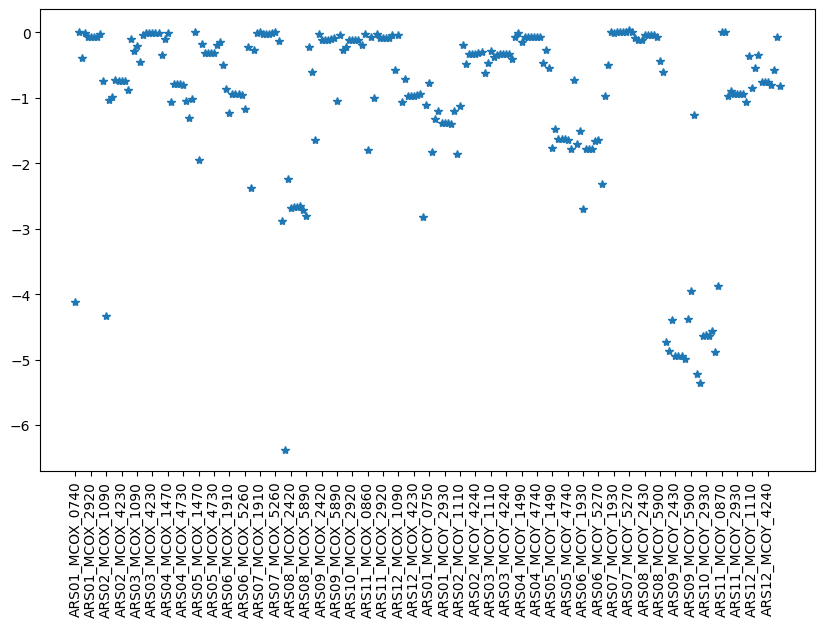

In [73]:

metric = RSquaredSeparated()
r2 = metric.call(output, inference).numpy()
r2 = pd.Series(data=r2, index=output_df.columns)
r2 = np.round(r2, decimals=5)
r2 = pd.DataFrame(r2).T
plt.figure(figsize=(10 ,6))
plt.plot(r2.iloc[0] ,'*')
plt.xticks(ticks=np.arange(0, len(r2[:].T) ,5) ,labels=r2.keys()[0::5], rotation=90)
plt.show()

In [61]:
inputcut =np.copy(input)
inputcut[:,20] = -5
inputcut[:,150] = -5

In [77]:
reconstruction, inference = model.predict(inputcut)
inference = scaling_reverse(inference, corr_min, corr_max, 0, 1)

316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step


In [78]:
np.mean(np.abs((reconstruction - input))) / np.mean(np.abs(input)) * 100
# 4.346784471623897 213649
#4.880156031905976 151249
#3.0691962373069237 160112

3.125419181734041

In [79]:
np.mean((inference - output) ** 2)

2.5625659515187053e-06

In [80]:

np.mean(np.abs((inference - output))) / np.mean(np.abs(output)) * 100
# 0.2084316709950323 213619
# 4.880156031905976 151245
#0.17508123929907707 160112

0.1733203285550816

In [ ]:
import itertools

collumns = list(range(130))
combinations =list(itertools.combinations(collumns, 5))
print(combinations)

In [30]:
reconstruction_error = []
reconstruction_error_max = []
inference_error = []
inference_error_max = []
tries = 2
max_broken = 50
pg = Progbar(max_broken*tries)
for i in range(max_broken):
    inference_error_loc = []
    inference_error_max_loc = []
    reconstruction_error_loc = []
    reconstruction_error_max_loc = []
    for j in range(tries):
        dropout_columns = np.random.choice(input.shape[1]//2, i, replace=False)
        dropout_colummns2 = dropout_columns+115
        dropout_columns = np.concatenate((dropout_columns,dropout_colummns2))
        inputcut = np.copy(input)
        inputcut[:,dropout_columns] = -5
        reconstruction, inference = model.predict(inputcut,verbose=0)
        inference = scaling_reverse(inference, corr_min, corr_max, 0, 1)
        inference_error_loc.append(np.mean(np.abs(inference - output)))
        inference_error_max_loc.append(np.max(np.abs(inference - output)))
        reconstruction_error_loc.append(np.mean(np.abs(reconstruction - input)))
        reconstruction_error_max_loc.append(np.max(np.abs(reconstruction - input)))
        pg.add(1)
    reconstruction_error.append(np.mean(reconstruction_error_loc))
    reconstruction_error_max.append(np.max(reconstruction_error_max_loc))
    inference_error.append(np.mean(inference_error_loc))
    inference_error_max.append(np.max(inference_error_max_loc))
    

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 375s 375ms/step


In [37]:
np.savez(path+'test_results.npz', reconstruction_error=reconstruction_error, inference_error=inference_error, inference_error_max=inference_error_max, reconstruction_error_max=reconstruction_error_max,tries = tries)

In [18]:
results = np.load(path+'test_results.npz')
reconstruction_error = results['reconstruction_error']
reconstruction_error_max = results['reconstruction_error_max']
inference_error_max = results['inference_error_max']
inference_error = results['inference_error']
print("Tries: ",results['tries'])
del results

Tries:  20


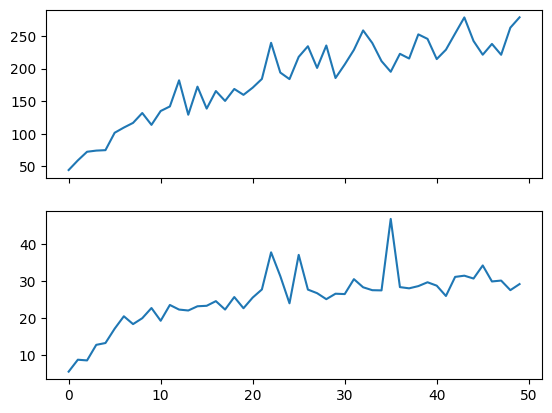

In [19]:
fig, axs = plt.subplots(2, 1,sharex= True)
axs[0].plot(((reconstruction_error_max) / np.mean(np.abs(input)))*100)
#[i.set_yscale('log') for i in axs]
axs[1].plot(((inference_error_max) / np.mean(np.abs(output)))*100)

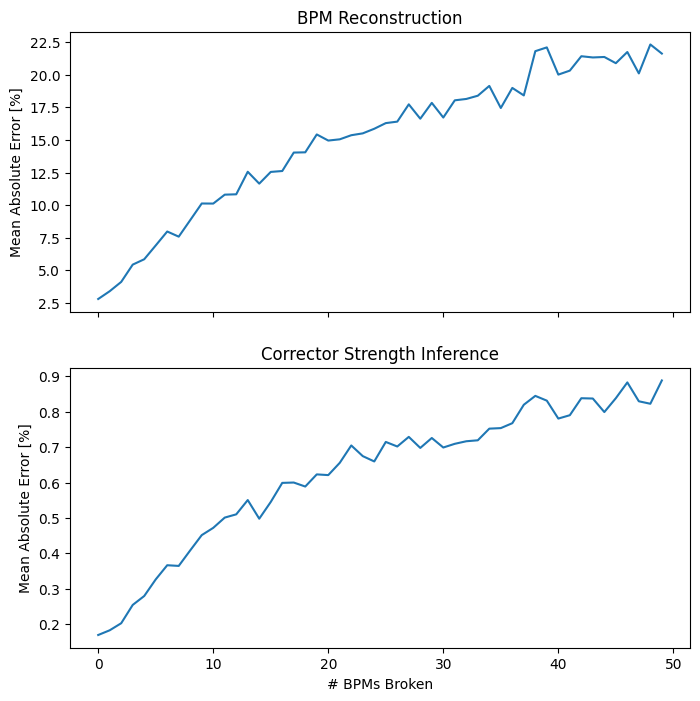

In [56]:
fig,axs = plt.subplots(2,1,figsize=(8,8),sharex=True)
axs[0].plot(((reconstruction_error)/np.mean(np.abs(input)))*100)
#[i.set_yscale('log') for i in axs]
axs[1].plot(((inference_error)/np.mean(np.abs(output)))*100)
axs[0].set(title='BPM Reconstruction',ylabel='Mean Absolute Error [%]')
axs[1].set(title='Corrector Strength Inference',ylabel='Mean Absolute Error [%]',xlabel="# BPMs Broken")
plt.savefig("BPMs Broken vs. MAE.svg")

In [ ]:
metric = RSquaredSeparated()
r2 = metric.call(output, inference).numpy()
r2 = pd.Series(data=r2, index=output_df.columns)
r2 = np.round(r2, decimals=5)
r2 = pd.DataFrame(r2).T
plt.figure(figsize=(10 ,6))
plt.plot(r2.iloc[0] ,'*')
plt.xticks(ticks=np.arange(0, len(r2[:].T) ,5) ,labels=r2.keys()[0::5], rotation=90)
plt.show()

In [22]:
dropout_columns = np.random.choice(input.shape[1]//2, 5, replace=False)
dropout_colummns2 = dropout_columns+115
dropout_columns = np.concatenate((dropout_columns,dropout_colummns2))
inputcut = np.copy(input)
inputcut[:,dropout_columns] = -5
reconstruction_cut, inference_cut = model.predict(inputcut)
inference_cut = scaling_reverse(inference_cut,corr_min,corr_max,0,1)

reconstruction, inference = model.predict(input)
inference = scaling_reverse(inference,corr_min,corr_max,0,1)



316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step


In [23]:
(np.mean(np.abs(inference - output)) / np.mean(np.abs(output))) * 100 # autoencoder


0.16947492783613283

In [24]:
rec_error_cut = np.mean(np.abs(reconstruction_cut-input),axis=0)/np.mean(np.abs(input),axis=0)*100
rec_error = np.mean(np.abs(reconstruction-input),axis=0)/np.mean(np.abs(input),axis=0)*100
inf_error_cut = np.mean(np.abs(inference_cut-output),axis=0)/np.mean(np.abs(output),axis=0)*100
inf_error = np.mean(np.abs(inference-output),axis=0)/np.mean(np.abs(output),axis=0)*100

In [126]:
print(np.mean(np.abs(inference-output),axis=0))/np.mean(np.abs(output),axis=0)*100

[4.44988653e-04 1.00486459e-03 7.71464894e-04 2.74252727e-05
 2.36143577e-05 2.34159132e-05 2.34117629e-05 2.38407728e-05
 2.97665629e-04 1.46949689e-03 3.32008363e-03 2.32431567e-03
 7.14932928e-05 2.41693936e-05 2.36155921e-05 2.31519592e-05
 2.38231356e-05 4.86200500e-04 2.21779840e-03 9.33928769e-04
 1.06699956e-03 7.41034604e-04 2.67862502e-05 2.37124599e-05
 2.33364249e-05 2.35422700e-05 2.40958355e-05 3.16311238e-04
 1.24956307e-03 2.29538586e-03 1.76057659e-03 5.44853947e-05
 2.38369237e-05 2.34519634e-05 2.32157219e-05 2.45050151e-05
 5.49728492e-04 2.34318025e-03 5.78039238e-04 1.28499012e-03
 4.50996657e-04 2.03922637e-05 2.37384723e-05 2.35003147e-05
 2.35019701e-05 2.41923607e-05 1.71063407e-04 1.21914510e-03
 1.96326614e-03 2.17203012e-03 6.76240885e-05 2.43272770e-05
 2.34110844e-05 2.33853868e-05 2.37686019e-05 5.25865301e-04
 1.75187509e-03 1.50849670e-03 1.49856471e-03 1.12447703e-03
 3.77060178e-05 2.39990617e-05 2.30869230e-05 2.33985669e-05
 2.43581904e-05 5.939766

TypeError: unsupported operand type(s) for /: 'NoneType' and 'float'

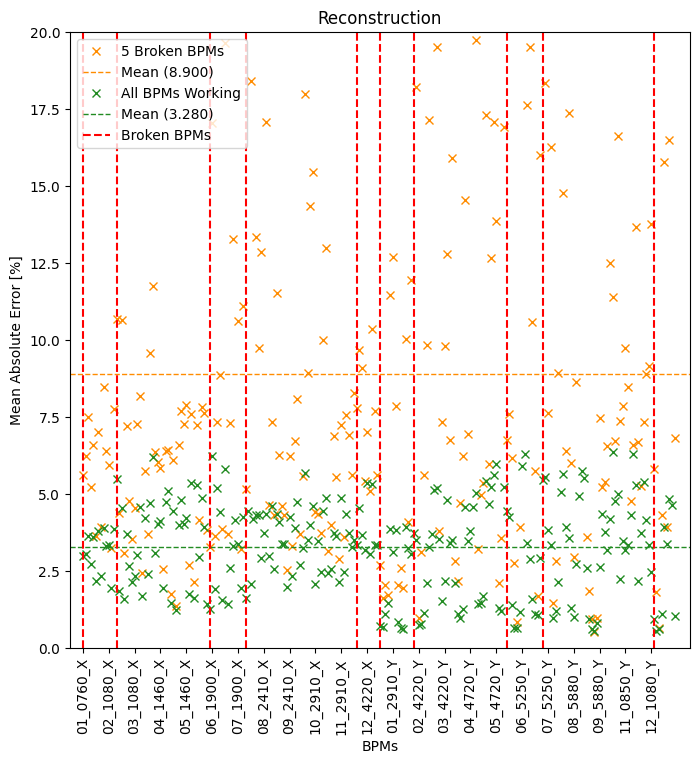

In [48]:
names = cleaned_strings = [s.replace("DBPM_", "").replace("ARS", "") for s in input_df.columns]
#print(names)

fig, axs = plt.subplots(1,1,figsize=(8,8))

axs.plot(rec_error_cut,"x",label='5 Broken BPMs',color="darkorange")
axs.hlines(np.mean(rec_error_cut),-5,235,label="Mean ({0:.3f})".format(np.mean(rec_error_cut)),color="darkorange",linestyles="dashed",linewidth=1)
axs.set_xticks(ticks=np.arange(0, 230 ,10) ,labels=names[0::10], rotation=90)
axs.plot(rec_error,"x",label='All BPMs Working',color="forestgreen")
axs.hlines(np.mean(rec_error),-5,235,label="Mean ({0:.3f})".format(np.mean(rec_error)),color="forestgreen",linestyles="dashed",linewidth=1)

axs.vlines(dropout_columns,0,20,colors="red",linestyles="dashed",label="Broken BPMs")
axs.set_ylim(0,20)
axs.set_xlim(-5,235)
axs.legend(loc="upper left")
axs.set(title="Reconstruction", xlabel="BPMs",ylabel="Mean Absolute Error [%]")
fig.savefig("single_shot5_rec.svg")

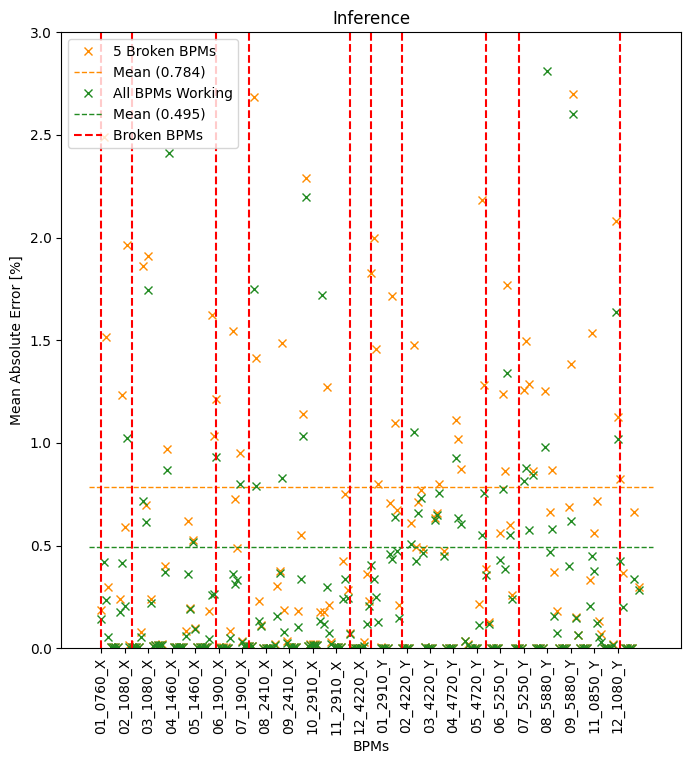

In [49]:
fig, axs = plt.subplots(1,1,figsize=(8,8))

axs.plot(inf_error_cut,"x",label='5 Broken BPMs',color="darkorange")
axs.hlines(np.mean(inf_error_cut),-5,235,label="Mean ({0:.3f})".format(np.mean(inf_error_cut)),color="darkorange",linestyles="dashed",linewidth=1)
axs.set_xticks(ticks=np.arange(0, 230 ,10) ,labels=names[0::10], rotation=90)
axs.set_ylim(0,3)
axs.plot(inf_error,"x",label='All BPMs Working',color="forestgreen")
axs.hlines(np.mean(inf_error),-5,235,label="Mean ({0:.3f})".format(np.mean(inf_error)),color="forestgreen",linestyles="dashed",linewidth=1)
axs.vlines(dropout_columns,0,10,colors="red",linestyles="dashed",label="Broken BPMs")
axs.set(title="Inference", xlabel="BPMs",ylabel="Mean Absolute Error [%]")
axs.legend(loc="upper left")
fig.savefig("single_shot5_inf.svg")

In [91]:
second_model = tf.keras.models.load_model("/home/guney/PycharmProjects/Summerproject/out/out/2024-06-25-212542/2/my_model_try.keras")
second_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_1           │ (None, 230)            │           920 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 230)            │        53,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 230)            │           920 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 230)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 230)            │        53,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 322,462 (2.46 MB)

 Trainable params: 107,180 (837.34 KB)

 Non-trainable params: 920 (7.19 KB)

 Optimizer params: 214,362 (1.64 MB)

In [113]:
rec,inf = model.predict(inputcut)
inf = scaling_reverse(inf,corr_min,corr_max,0,1)
input2 = np.copy(inputcut)
input2[:,dropout_columns] = rec[:,dropout_columns]
inf2 = second_model.predict(input2)
inf2 = scaling_reverse(inf2,corr_min,corr_max,0,1)


316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step


In [114]:
np.mean(np.abs((inf - output))) / np.mean(np.abs(output)) * 100 # autoencoder


0.29058710172956165

In [115]:
np.mean(np.abs((inf2 - output))) / np.mean(np.abs(output)) * 100 # autoencoder


0.3917046667537926